<a href="https://colab.research.google.com/github/pauljp75/CognoRise-Infotech/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

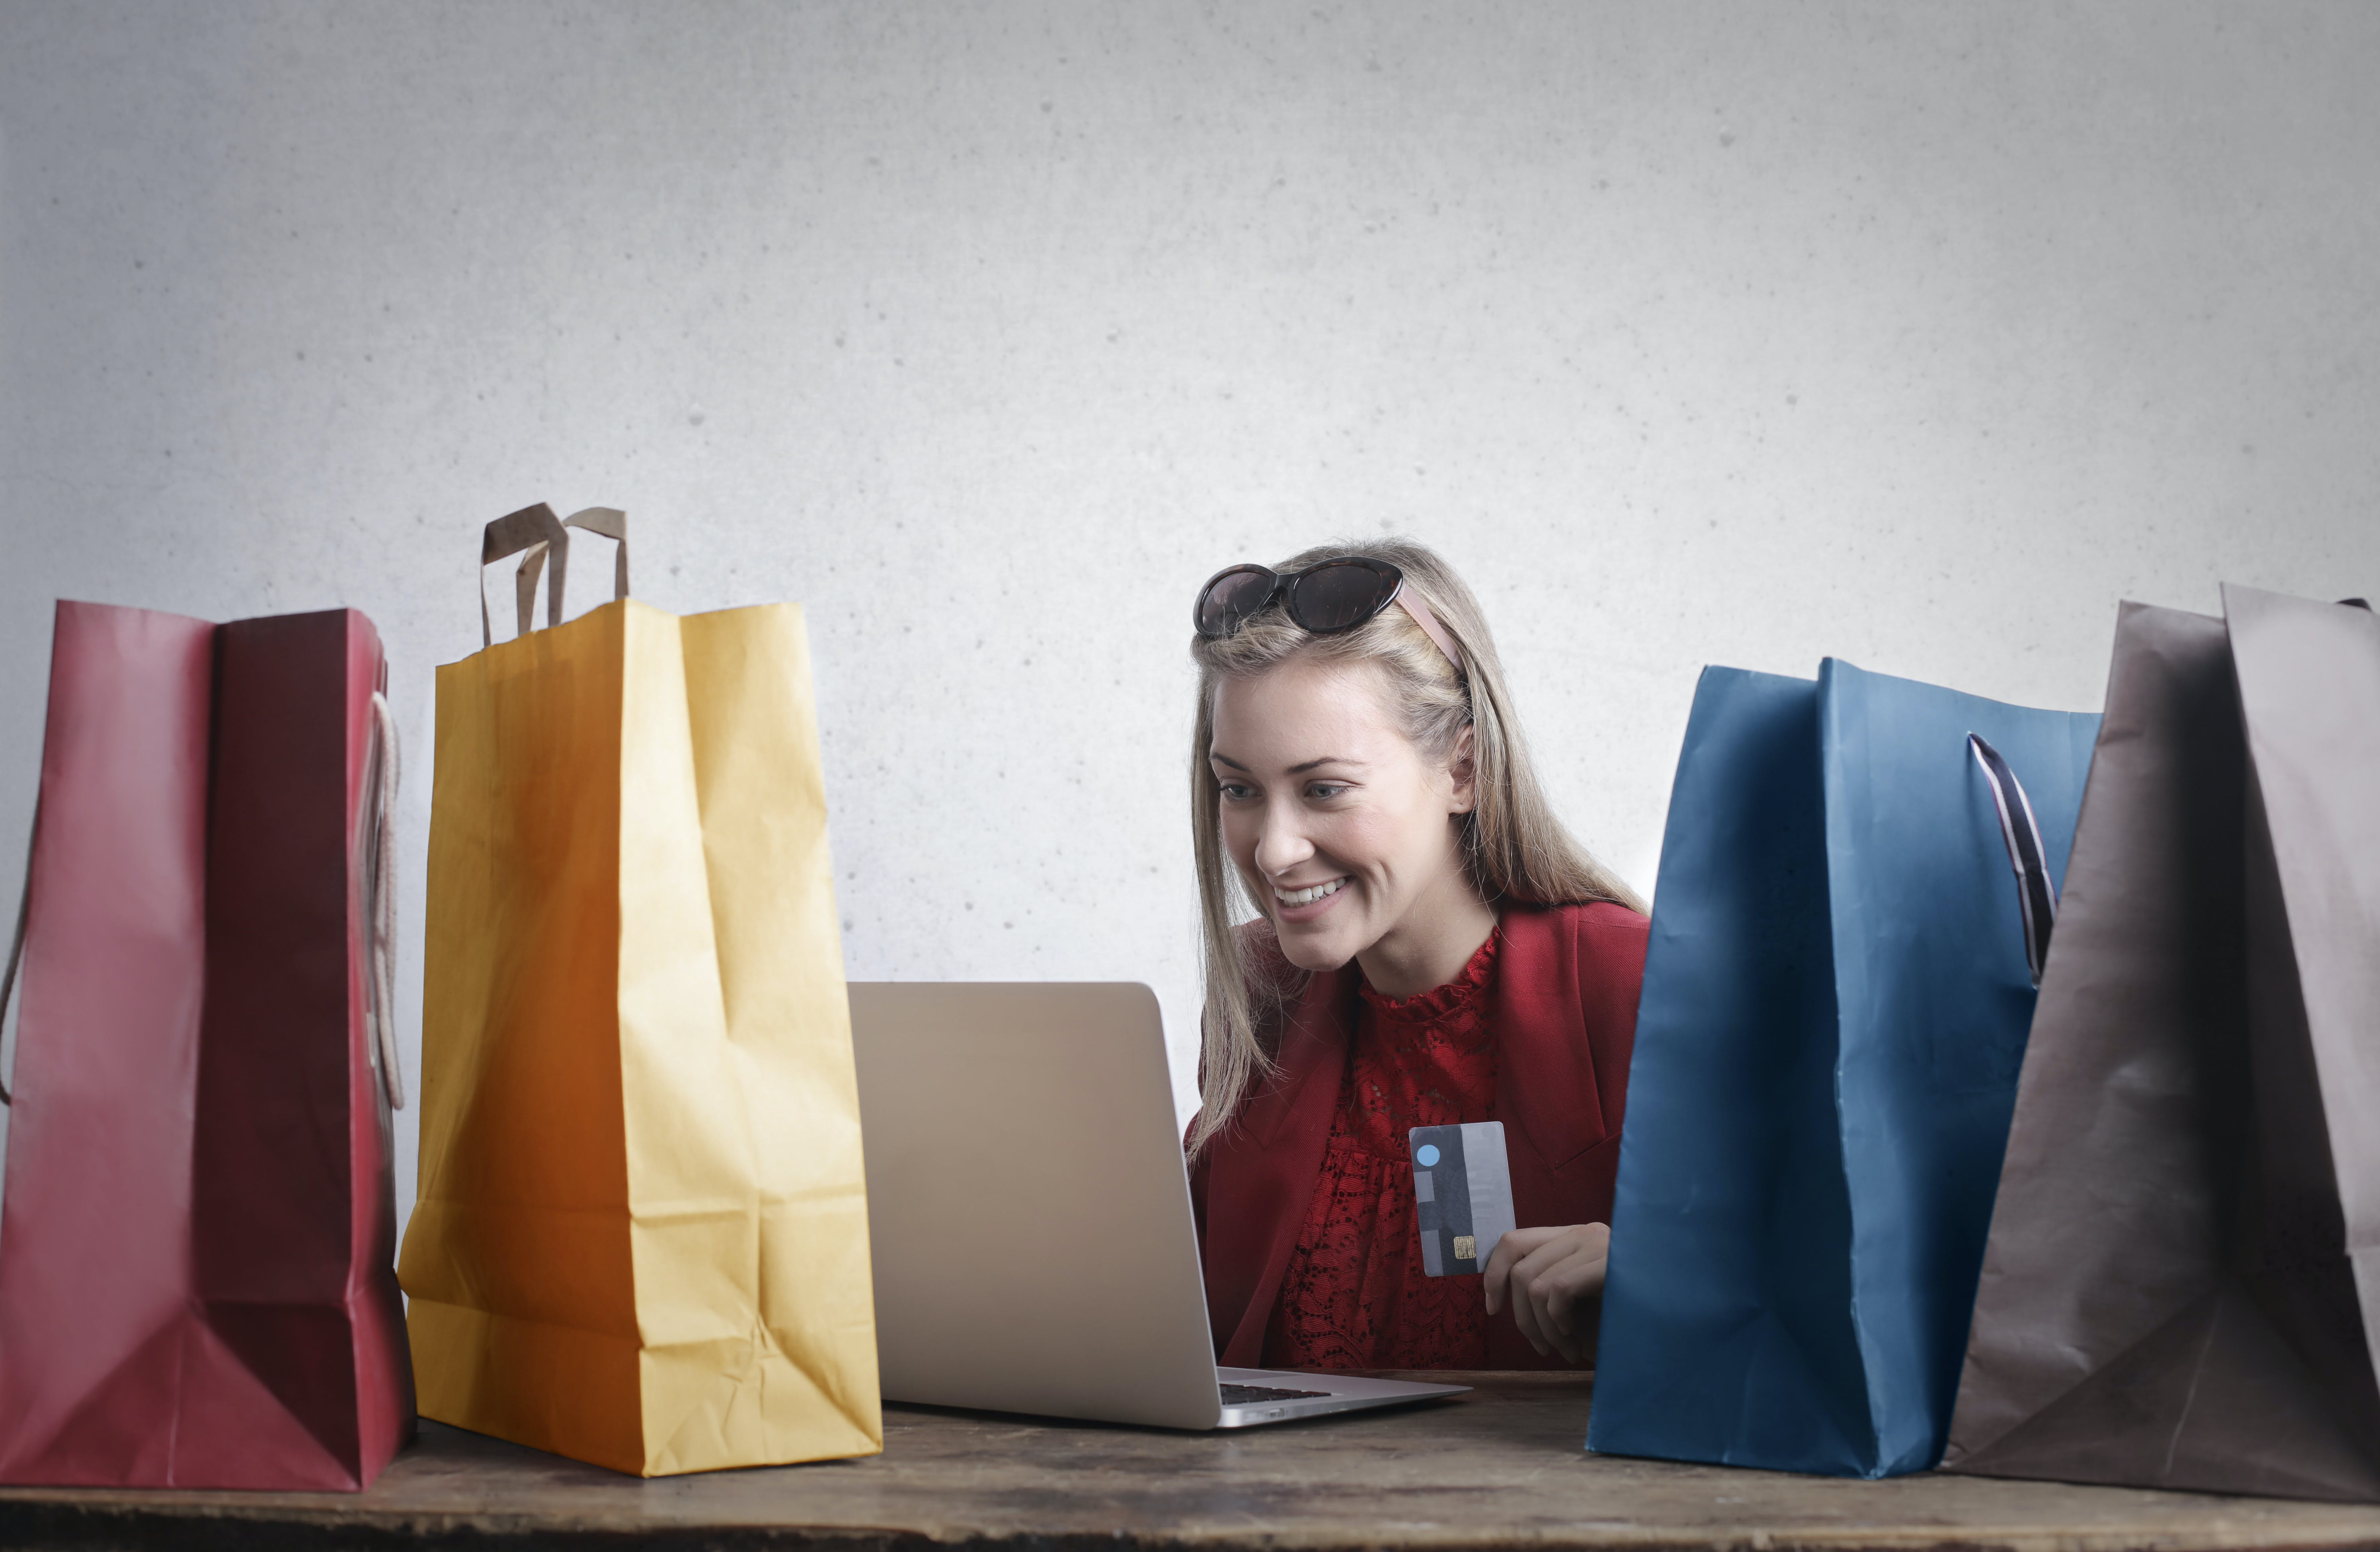

# **Customer Personality Analysis**

**OBJECTIVE**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



# **Content**











**People**

*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise




**Products**

*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years
















**Promotion**

*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


















**Place**

*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue

*   NumStorePurchases: Number of purchases made directly in stores

*   NumWebVisitsMonth: Number of visits to company’s website in the last month








In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio



In [ ]:
from datetime import date
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer
from importlib import reload

In [ ]:
#Load Data
df=pd.read_csv("/content/marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Notes**
- Income : mean almost equal 52247 and min value equal 1730 and max value equal
  666666
- The outliers here may be due to the difference in education level of each
  customer
- Year_Birth : mean almost equal 1969 and min equal 1893 and max equal 1996
- age : mean equal 54
- Kidhome : min equal 0 (They have no children) and max equal 2
- Teenhome : min equal 0 (They don't have teens) and max equal 2
- Customers spend more on meat products
- Customers spend least on fruits products

**DATA PREPROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Create an age column
df['Age']=2023-df['Year_Birth']

Data Type

In [ ]:
#Convert Dt_Customer to Datatime Datatype.
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")
#'coerce' invalid parsing will be set as NaT.

In [ ]:
df["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


Remove Outliers

In [ ]:
df["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

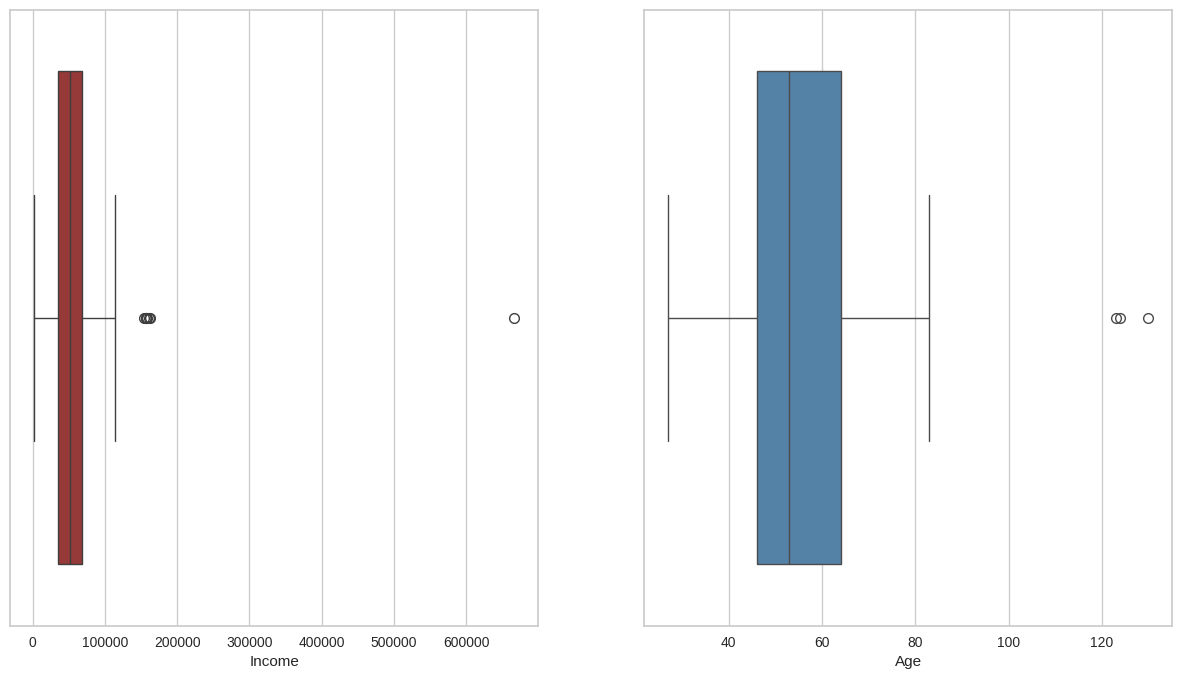

In [ ]:
#Checking the outliers in Age and Income columns.
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel='Income'
sns.boxplot(data=df,x='Income',color='brown')
plt.subplot(1,2,2)
plt.xlabel='Age'
sns.boxplot(data=df,x='Age',color='steelblue')

In [ ]:
#Delete the outliers

#Age column
df = df[df['Age'] < 80]
#Income column
df=df[df['Income']<150000]

<Axes: xlabel='Age'>

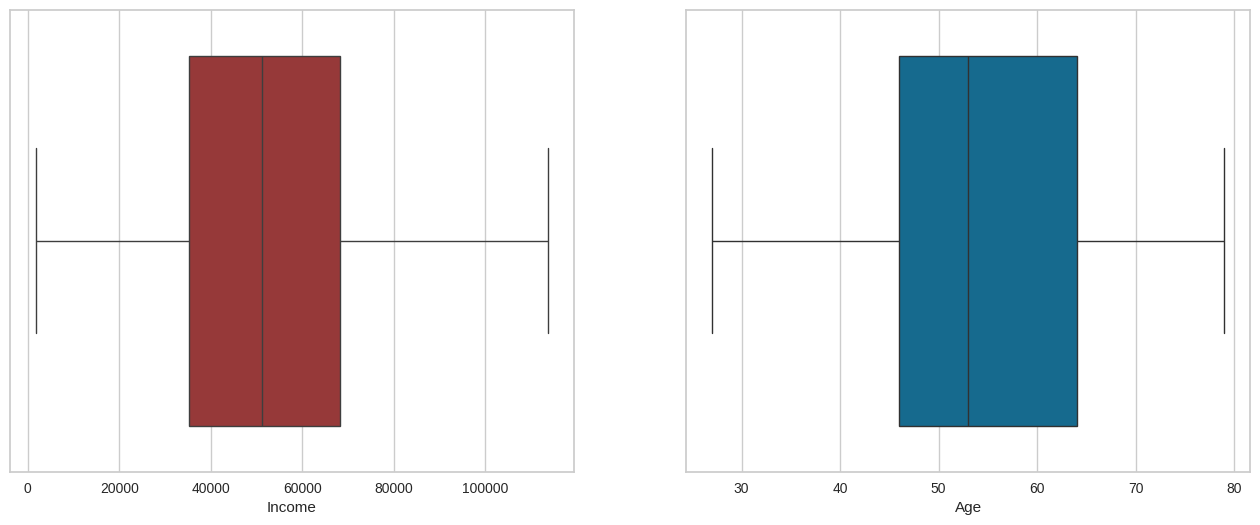

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel='Income'
sns.boxplot(data=df,x='Income',color = "brown")
plt.subplot(1,2,2)
plt.xlabel='Age'
sns.boxplot(data=df,x='Age')

Missing Values

In [ ]:
#Missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

**Feature Engineering**

In [ ]:
data = df.copy()

In [ ]:
#Spending feature creation
data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts']+ data['MntSweetProducts'] + data['MntGoldProds']

In [ ]:
#Seniority feature creation
last_date = date(2023,9, 10)

def seniority(x):
    return last_date - x

data['Seniority'] = pd.to_numeric(data['Dt_Customer'].dt.date.apply(seniority).dt.days, downcast='integer')/365

In [ ]:
#Rename some cols
data=data.rename(columns={'NumWebPurchases': 'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [ ]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Matrial Status, i will  convert to 2 unique values ..
#Alone ==> Divorced, Single, Absurd, Widow , YOLO.
#Couple ==> Married, Together.
data["Marital_Status"] = data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [ ]:
data["Marital_Status"].nunique()

2

In [ ]:
print(f"Education column number of unique value : {data['Education'].nunique()}")
print(f"Education column unique value : {data['Education'].unique()}")

Education column number of unique value : 5
Education column unique value : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [ ]:
data['Education'].value_counts()

Graduation    1113
PhD            470
Master         362
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
#Education column , i will  convert to 2 unique values ..
#ungrad. ==> Basic, 2n Cycle .
#postgrad. ==> Graduation, Master, PhD.
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [ ]:
print(f"after update , Education column number of unique value : {data['Education'].nunique()}")
print(f"after update , Education column unique value : {data['Education'].unique()}")

after update , Education column number of unique value : 2
after update , Education column unique value : ['Postgraduate' 'Undergraduate']


In [ ]:
print(f"num of unique value in kidhome : {data['Kidhome'].nunique()}")
print(f"num of unique value in Teenhome : {data['Teenhome'].nunique()}")

num of unique value in kidhome : 3
num of unique value in Teenhome : 3


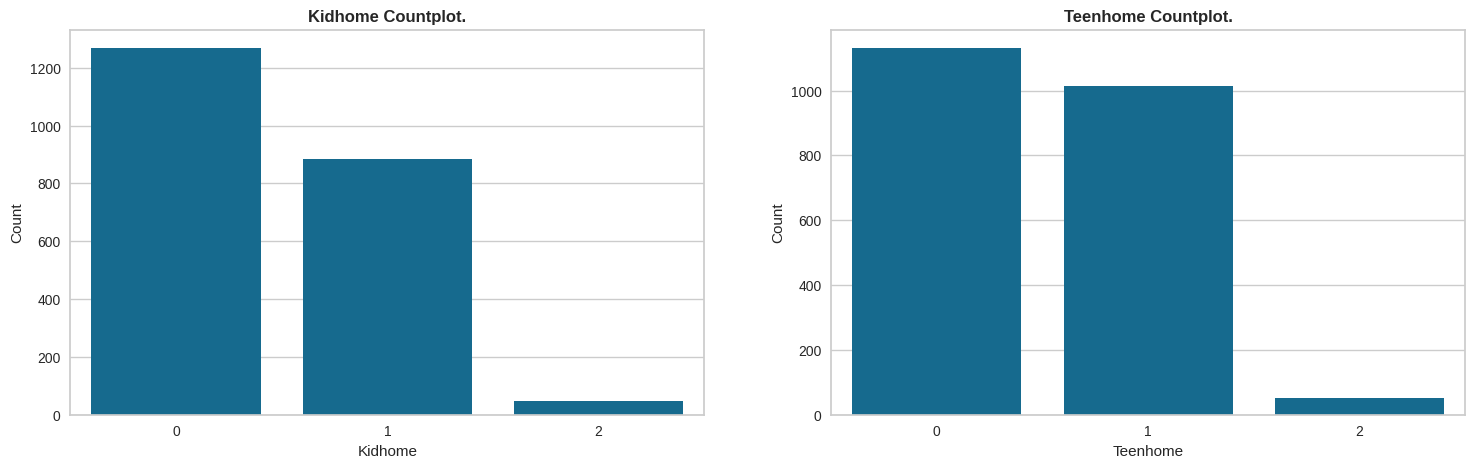

In [ ]:
used_cols = ["Kidhome", "Teenhome"]

fig, ax = plt.subplots(1, 2, figsize = (18,5))

for i in range(2):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i])
    ax[i].set_title(f"{used_cols[i]} Countplot.", weight="bold")
    ax[i].set_ylabel("Count")

plt.show()

In [ ]:
#Children feature creation
data['Children'] = data['Kidhome'] + data['Teenhome']

In [ ]:
def has_chid_or_no(x):
    if x > 0:
        return "Has child"
    else :
        return "no child"

data['Has_child'] = data["Children"].apply(has_chid_or_no)

In [ ]:
data['Has_child'].value_counts()

Has child    1577
no child      620
Name: Has_child, dtype: int64

In [ ]:
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [ ]:
data['Children'].value_counts()

1 child       1112
No child       620
2 children     415
3 children      50
Name: Children, dtype: int64

In [ ]:
#Rename some cols
data = data.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals'})

In [ ]:
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sample(5)
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
258,0,0,0,0,0,0
36,0,0,0,0,0,0
766,0,0,0,0,0,0
634,0,0,0,0,0,1
663,0,0,0,0,0,0


In [ ]:
#Campaigns_Accepted feature creation
data['Campaigns_Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
data['Campaigns_Accepted'].value_counts().to_frame()

,Campaigns_Accepted
0,1743
1,318
2,81
3,44
4,11


In [ ]:
#Drop some features
drop_list =['ID', 'Year_Birth' ,'Kidhome','Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact','Z_Revenue']
data.drop(drop_list, inplace=True, axis=1)
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Deals', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Spending', 'Seniority', 'Children', 'Has_child', 'Campaigns_Accepted'],
      dtype='object')

In [ ]:
#Rename columns
data.columns = data.columns.str.capitalize()

# **Data Analysis**

**Age**

In [ ]:
np.floor(data["Age"].describe()).to_frame()

,Age
count,2197.0
mean,53.0
std,11.0
min,27.0
25%,46.0
50%,53.0
75%,64.0
max,79.0


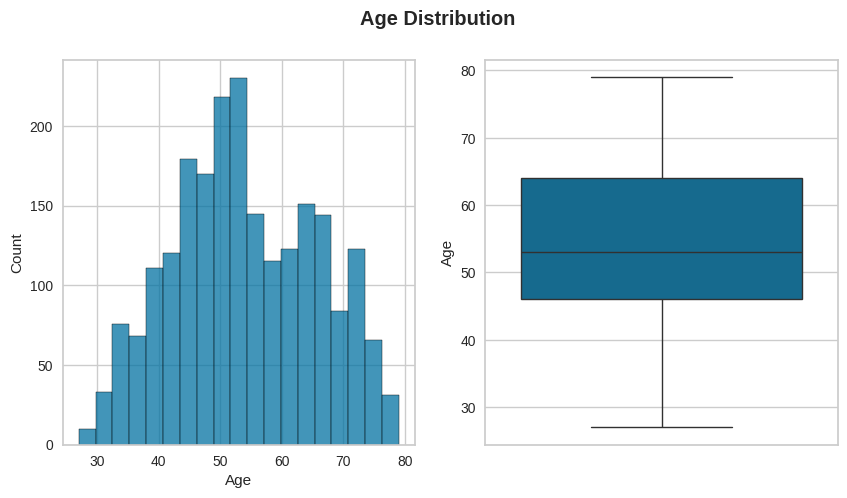

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Age")
sns.boxplot(ax=ax[1], data=data, y="Age")
fig.suptitle('Age Distribution', weight="bold")
plt.show()

Note - The ages of customers range from 27 to 83, and the average age is equal to 53

**Income**

In [ ]:
data['Income'].describe().to_frame()

,Income
count,2197.000000
mean,51574.240328
std,20715.484457
min,1730.000000
25%,35178.000000
50%,51267.000000
75%,68274.000000
max,113734.000000


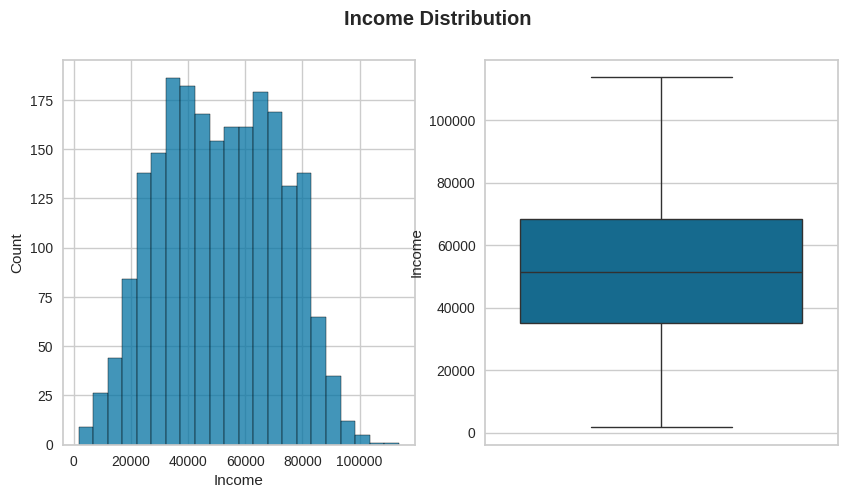

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.histplot(ax=ax[0], data=data, x="Income")
sns.boxplot(ax=ax[1], data=data, y="Income")
fig.suptitle('Income Distribution', weight="bold")
plt.show()

Note -
The average income is 51574.24 and the min income value is 1730

**Seniority**

In [ ]:
data['Seniority'].describe()

count    2197.000000
mean       10.174538
std         0.555559
min         9.205479
25%         9.698630
50%        10.178082
75%        10.654795
max        11.120548
Name: Seniority, dtype: float64

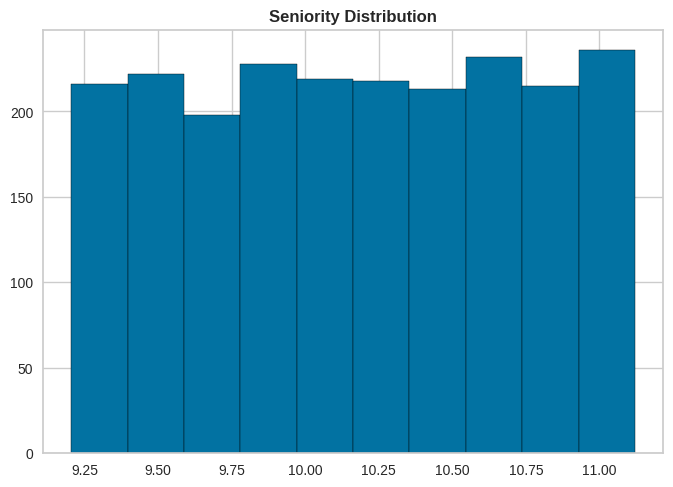

In [ ]:
plt.hist(x=data["Seniority"],edgecolor="black")
plt.title("Seniority Distribution", weight="bold")
plt.show()

**Products**

In [ ]:
products = data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
products.describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold
count,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,304.847519,26.431953,164.836595,37.538462,27.143377,44.129267
std,336.671723,39.841838,217.630005,54.695098,41.175122,51.809943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,505.000000,33.000000,232.000000,50.000000,33.000000,57.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


Note - Right Skewed in ALL PRODUCTS: The mean is greater than the median

In [ ]:
data[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

Wines     669750
Fruits     58071
Meat      362146
Fish       82472
Sweets     59634
Gold       96952
dtype: int64

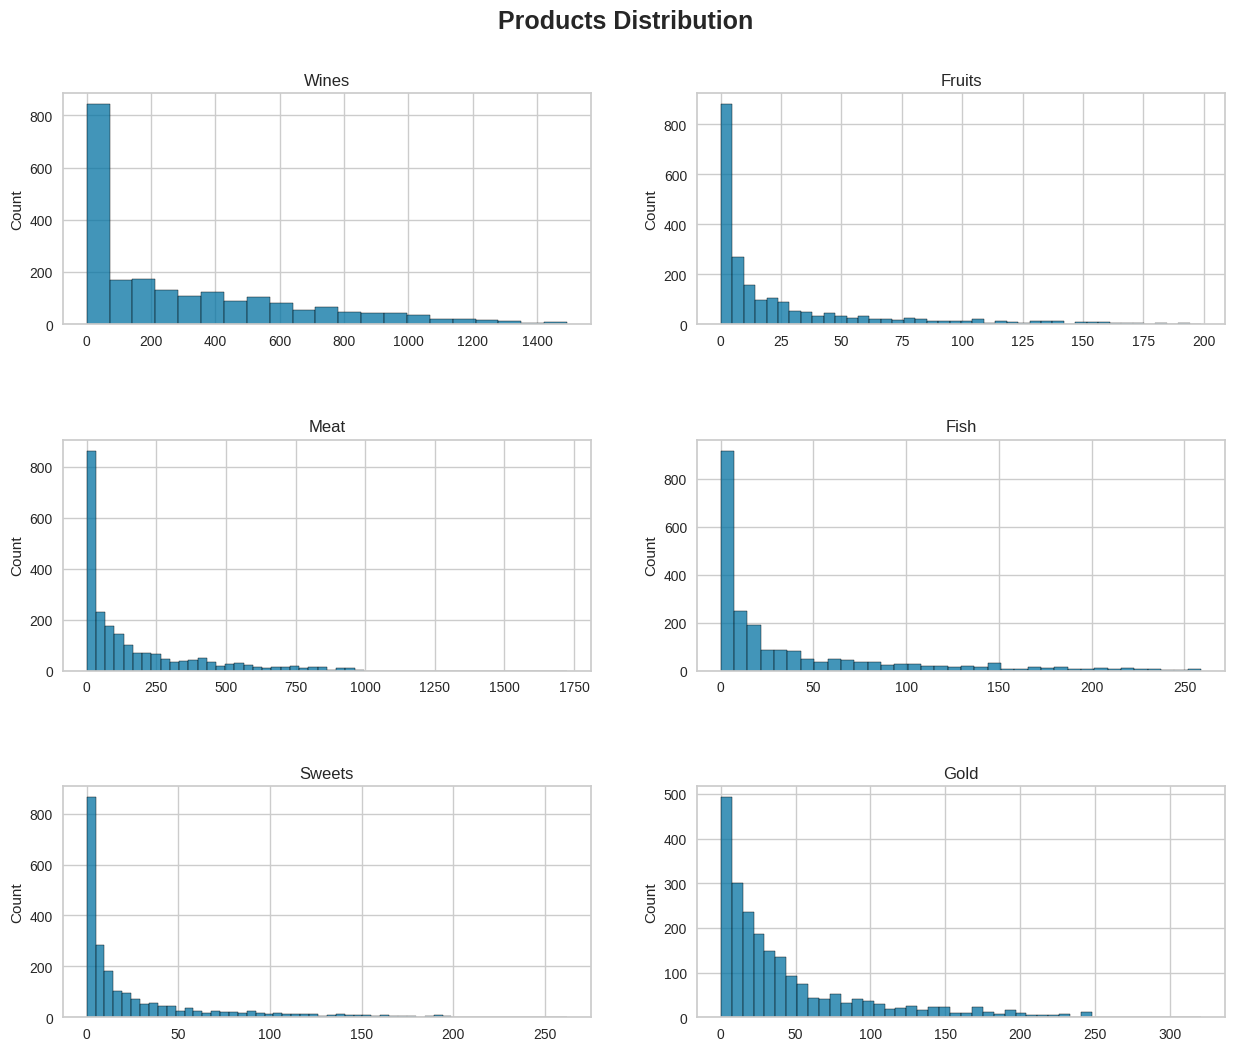

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Products Distribution", fontsize=18, y=0.95, weight="bold")



for i, product in enumerate(products.columns.tolist()):

    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ax=ax, data=products, x=products[product])

    # chart formatting
    ax.set_title(f"{product}")
    ax.set_xlabel("")

plt.show()

Note - Distribution plots indicate skewed to the right distributions of features. Thus, it is crucial to avoid assuming that a product (e.g., Wines, meats) is the top-selling.

**Spending**

In [ ]:
data["Spending"].describe().to_frame()

,Spending
count,2197.000000
mean,604.927173
std,601.015476
min,5.000000
25%,69.000000
50%,396.000000
75%,1044.000000
max,2525.000000


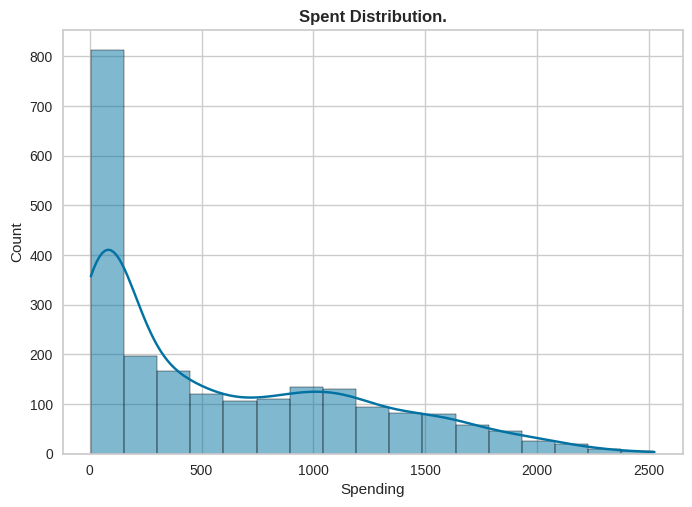

In [ ]:
sns.histplot(data=data, x="Spending", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()

Note - More than 50% of customers spend less than 10000$

**Education**

In [ ]:
pd.DataFrame({"Count" : data["Education"].value_counts(),
              "Percentage" : round(data["Education"].value_counts(normalize=True),2)*100})

,Count,Percentage
Postgraduate,1945,89.0
Undergraduate,252,11.0


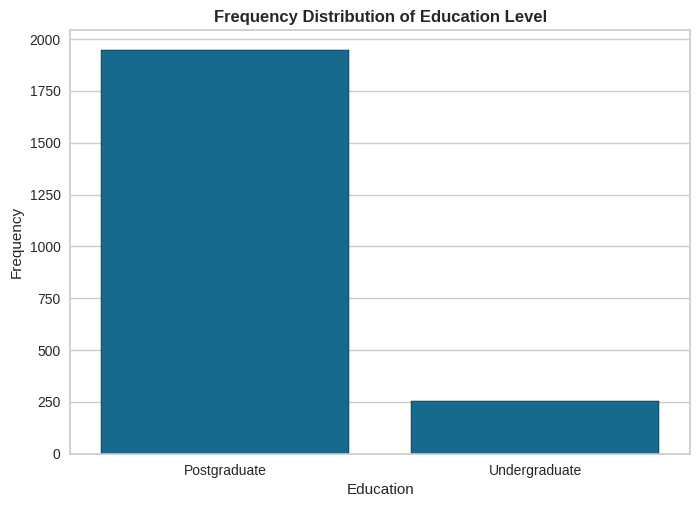

In [ ]:
sns.countplot(data=data, x="Education",edgecolor="black")

plt.title("Frequency Distribution of Education Level", weight="bold")
plt.ylabel("Frequency")
plt.show()

Note - The majority is Postgraduate, 89%.

**Marital Status**

In [ ]:
pd.DataFrame({"Count" : data["Marital_status"].value_counts(),
              "Percentage" : round(data["Marital_status"].value_counts(normalize=True),2)*100})

,Count,Percentage
Couple,1419,65.0
Alone,778,35.0


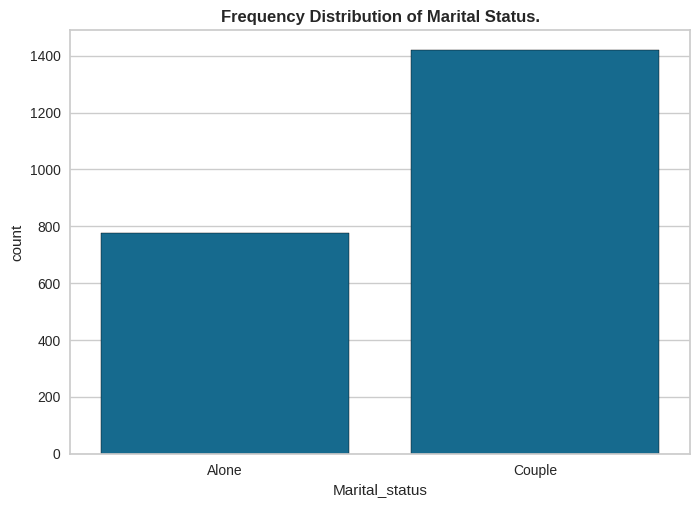

In [ ]:
sns.countplot(data=data,x="Marital_status", edgecolor="black")
plt.title("Frequency Distribution of Marital Status.", weight="bold")
plt.show()

Note - The majority is In couple, 65%.

**Children**

In [ ]:
pd.DataFrame({"Count" : data["Children"].value_counts(),
              "Percentage" : round(data["Children"].value_counts(normalize=True),2)*100})

,Count,Percentage
1 child,1112,51.0
No child,620,28.0
2 children,415,19.0
3 children,50,2.0


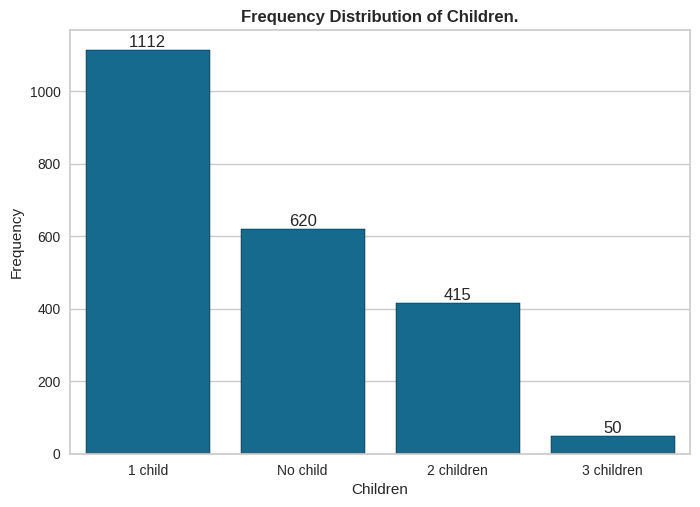

In [ ]:
ax = sns.countplot(data=data, x="Children", edgecolor="black",
                   order = data['Children'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Frequency Distribution of Children.", weight="bold")
plt.ylabel("Frequency")
plt.show()

Note - 51% of clients have one child.

In [ ]:
pd.DataFrame({"Count" : data["Has_child"].value_counts(),
              "Percentage" : round(data["Has_child"].value_counts(normalize=True),2)*100})

,Count,Percentage
Has child,1577,72.0
no child,620,28.0


In [ ]:
px.histogram(data,
             x="Has_child",
             color_discrete_sequence=px.colors.qualitative.Antique,
             title= "<b>Visualizing Has Child Feature Frequencies")

Note - 72% of customers have children.

**Campaigns**

In [ ]:
data["Campaigns_accepted"].unique()

array([0, 1, 2, 3, 4])

In [ ]:
pd.DataFrame({"Count" : data["Campaigns_accepted"].value_counts(),
              "Percentage" : round(data["Campaigns_accepted"].value_counts(normalize=True),3)*100})

,Count,Percentage
0,1743,79.3
1,318,14.5
2,81,3.7
3,44,2.0
4,11,0.5


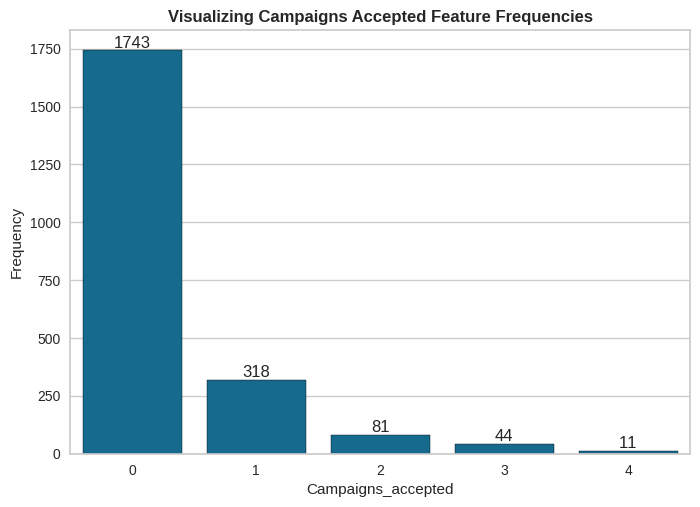

In [ ]:
ax = sns.countplot(data=data, x="Campaigns_accepted", edgecolor="black")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Visualizing Campaigns Accepted Feature Frequencies", weight="bold")
plt.ylabel("Frequency")
plt.show()

Note - The majority of campaigns are not accepted, at a rate of 79%

**Response**


*   1 if customer accepted the offer in the last campaign, 0 otherwise




In [ ]:
pd.DataFrame({"Count" : data["Response"].value_counts(),
              "Percentage" : round(data["Response"].value_counts(normalize=True),3)*100})

,Count,Percentage
0,1866,84.9
1,331,15.1


**Recency**


*   Number of days since customer's last purchase




In [ ]:
data["Recency"].describe()

count    2197.000000
mean       48.946746
std        28.953489
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

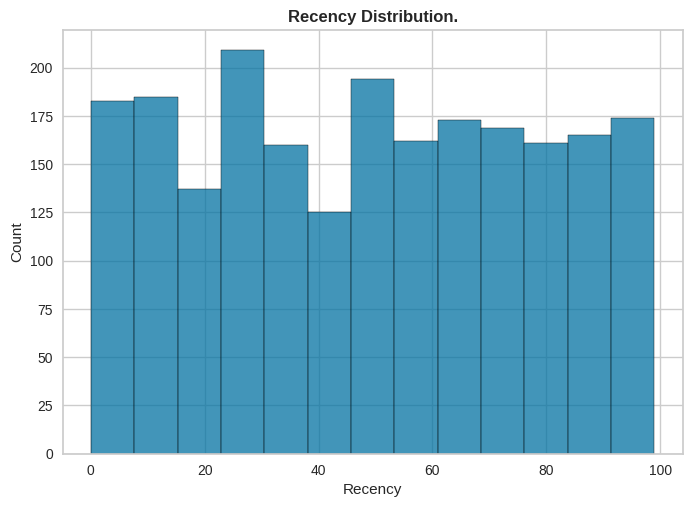

In [ ]:
sns.histplot(data=data,
            x="Recency",
            edgecolor='black')
plt.title("Recency Distribution.", weight="bold")
plt.show()

**Place**



*   Web: Number of purchases made through the company’s website
*   Catalog: Number of purchases made using a catalogue
*   Store: Number of purchases made directly in stores




In [ ]:
data[['Web', 'Catalog', 'Store']].describe()

,Web,Catalog,Store
count,2197.000000,2197.000000,2197.000000
mean,4.093764,2.633591,5.817478
std,2.737339,2.789360,3.238811
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


<ipython-input-433-721a05a9e9c6>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-433-721a05a9e9c6>:7: UserWarning:


The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.

<ipython-input-433-721a05a9e9c6>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-433-721a05a9e9c6>:7: UserWarning:


The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.

<ipython-input-433-721a05a9e9c6>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipyt

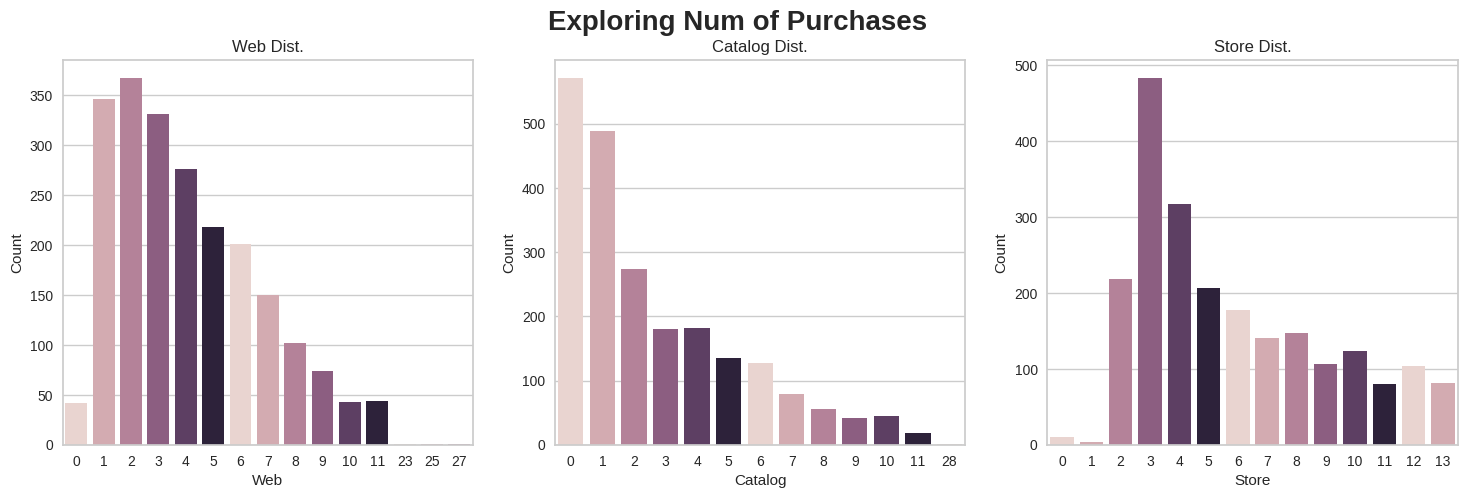

In [ ]:
used_cols = ['Web', 'Catalog', 'Store']

fig, ax = plt.subplots(1, 3, figsize = (18,5))
plt.suptitle("Exploring Num of Purchases", fontsize=20, weight="bold")

for i in range(3):
    sns.countplot(ax=ax[i], data=data, x=used_cols[i], palette=sns.cubehelix_palette())
    ax[i].set_title(f"{used_cols[i]} Dist.")
    ax[i].set_ylabel("Count")

In [ ]:
Purchases = pd.DataFrame(data[['Web', 'Catalog', 'Store']].sum()).rename(columns={0:"Count"})
Purchases

,Count
Web,8994
Catalog,5786
Store,12781


Note - Most purchases are made through the store

**Complain**

*   1 if the customer complained in the last 2 years, 0 otherwise




In [ ]:
pd.DataFrame({"Count" : data["Complain"].value_counts(),
              "Percentage" : round(data["Complain"].value_counts(normalize=True),3)*100})

,Count,Percentage
0,2178,99.1
1,19,0.9


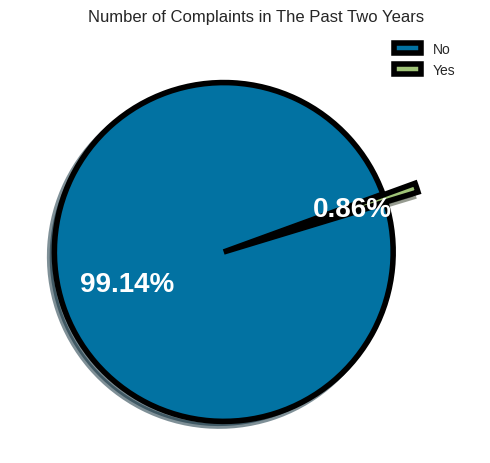

In [ ]:
Complain_counts = data["Complain"].value_counts()
plt.pie(Complain_counts.values,
        labels=Complain_counts.index.map({0: "No", 1: "Yes"}),
        explode=[0.2,0],
        shadow=True,
        textprops=dict(size= 20, color= "white", weight="bold"),
        autopct="%.2f%%",
        wedgeprops=dict(edgecolor = "black", linewidth = 4),
        startangle = 20)
plt.title("Number of Complaints in The Past Two Years")
plt.legend(["No", "Yes"])
plt.show()

Note - 99% of customers have not complained in the past two years

**Dt_Customer**


*   Date of customer's enrollment with the company




In [ ]:
#month feature creation
data["customer_month"] = data["Dt_customer"].dt.month_name()
#year feature creation
data["customer_year"] = data["Dt_customer"].dt.year
#day feature creation
data["day_name"] = data["Dt_customer"].dt.day_name()

In [ ]:
data["customer_month"].value_counts().sort_values(ascending=False)

August       216
May          212
October      209
March        207
January      195
September    189
November     183
April        179
December     175
February     174
June         160
July          98
Name: customer_month, dtype: int64

In [ ]:
data["customer_year"].value_counts().sort_values(ascending=False)

2013    1159
2014     549
2012     489
Name: customer_year, dtype: int64

Note - In 2013, we gained many customers

**Numwebvisitsmonth**

*   Number of visits to company’s website in the last month




In [ ]:
data["Numwebvisitsmonth"].describe()

count    2197.000000
mean        5.342285
std         2.413400
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: Numwebvisitsmonth, dtype: float64

In [ ]:
data["Numwebvisitsmonth"].sum()

11737

Note - The Total of Num Web Visits Month = 11781

**Age and Income**

In [ ]:
corre = data[["Income", "Age"]].corr()
print(f"The Correlation Between Income and Age = {round(corre.loc['Age','Income'],3)}")

The Correlation Between Income and Age = 0.21


In [ ]:
def scatter_plot(Data, X, Y, h=None):
    sns.scatterplot(data=Data, x=X, y=Y,  hue=h)
    plt.title(f"Correlation Between {X} and {Y}.")
    plt.show()

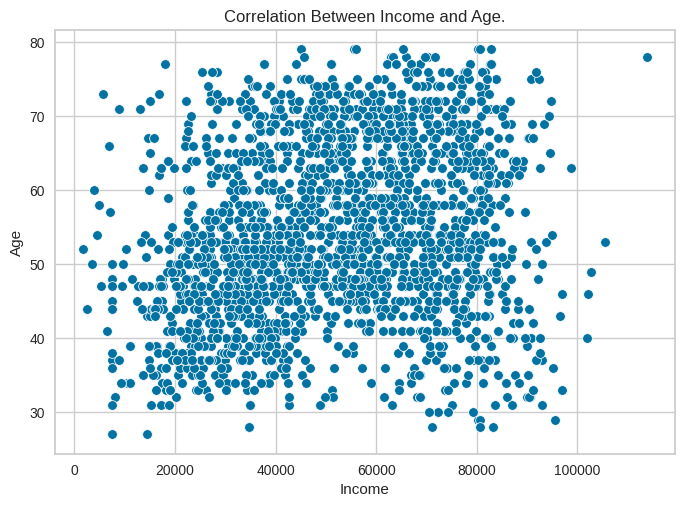

In [ ]:
scatter_plot(Data=data, X="Income", Y="Age")

In [ ]:
data[["Age", "Income"]].corr()

,Age,Income
Age,1.000000,0.209685
Income,0.209685,1.000000


In [ ]:
px.imshow(data[["Age", "Income"]].corr(), text_auto=True,
         title="<b>Correlation Between Age and Income",  color_continuous_scale=px.colors.qualitative.Antique)

Note - The Correlation Between (Income, Age) is Weak Positive Corr.

**Couples and Singles**

In [ ]:
data.groupby('Marital_status')['Spending'].sum().to_frame()

,Spending
Marital_status,
Alone,484676
Couple,844349


Note - Obviously, Couples Spend More Money Than Single Customers.

In [ ]:
products_list = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
l = data.groupby('Marital_status')[products_list].sum()

In [ ]:
fig = px.bar(data_frame=l.reset_index(), x='Marital_status',
            y=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
            barmode="group", title="<b> Marital Status by Products Purchase",
            color_discrete_sequence=px.colors.sequential.Greys_r)
fig.show()

**Education and Income**

In [ ]:
data.groupby("Education")["Income"].sum().to_frame()

,Income
Education,
Postgraduate,102782252.0
Undergraduate,10526354.0


Note - Makes Sense , Postgraduate Customer have more income than Undergraduate

In [ ]:
fig = px.histogram(data_frame=data, x="Income", color="Education",
                   title= "Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

In [ ]:
fig1 = px.box(data_frame=data, x="Education", y="Income",
             title= "<b> Income Distribution by Education Category", color_discrete_sequence=px.colors.qualitative.Antique)
fig2 = px.strip(data, x="Education", y="Income", color_discrete_sequence=px.colors.qualitative.Antique)
all_fig = go.Figure(data=fig1.data + fig2.data, layout=fig1.layout) ## combine
all_fig.show()

**Correlation between Products**

In [ ]:
product_corr = data[products_list].corr()
product_corr

,Wines,Fruits,Meat,Fish,Sweets,Gold
Wines,1.000000,0.386102,0.592396,0.395029,0.390511,0.393325
Fruits,0.386102,1.000000,0.569706,0.596492,0.571449,0.392536
Meat,0.592396,0.569706,1.000000,0.596350,0.559161,0.377589
Fish,0.395029,0.596492,0.596350,1.000000,0.584779,0.428276
Sweets,0.390511,0.571449,0.559161,0.584779,1.000000,0.355489
Gold,0.393325,0.392536,0.377589,0.428276,0.355489,1.000000


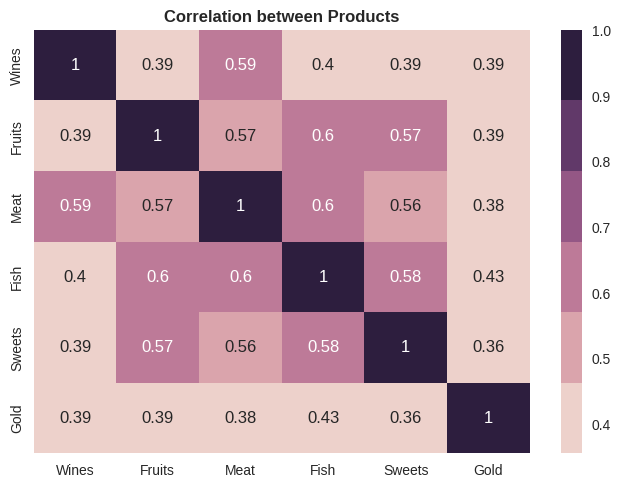

In [ ]:
sns.heatmap(product_corr, annot=True, cmap=sns.cubehelix_palette())
plt.title("Correlation between Products", weight="bold")
plt.show()

**Income and Spending**

In [ ]:
data[["Income", "Spending"]].corr()

,Income,Spending
Income,1.000000,0.823457
Spending,0.823457,1.000000


In [ ]:
fig = px.scatter(data_frame=data, x="Income",y="Spending", color="Education",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Income and Spending")
fig.show()

Note - There is a Positive Correlation between Income and Spending

**Deals and Spending**

In [ ]:
data[["Deals", "Spending"]].corr()

,Deals,Spending
Deals,1.000000,-0.076854
Spending,-0.076854,1.000000


In [ ]:
fig = px.scatter(data_frame=data, y="Deals", x="Spending",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Deals and Spending")
fig.show()

Note - There is no correlation between Deals and Spending

Age and Products

In [ ]:
corr_agg = round(data[products_list+["Age"]].corr(),3).loc["Age",:"Gold"].to_frame()

In [ ]:
px.imshow(corr_agg, text_auto=True,
         title="<b>Correlation Between Age and Products",  color_continuous_scale=px.colors.qualitative.Antique)

# **ML Model**

In [ ]:
#Create copy from data
df2 = data.copy()

**Label Encoding**

In [ ]:
#Select Categorical Columns
categorical_cols = df2.select_dtypes(include="object").columns.to_list()
print(categorical_cols)

['Education', 'Marital_status', 'Children', 'Has_child', 'customer_month', 'day_name']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in categorical_cols:
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.dtypes

Education                      int64
Marital_status                 int64
Income                       float64
Dt_customer           datetime64[ns]
Recency                        int64
Wines                          int64
Fruits                         int64
Meat                           int64
Fish                           int64
Sweets                         int64
Gold                           int64
Deals                          int64
Web                            int64
Catalog                        int64
Store                          int64
Numwebvisitsmonth              int64
Complain                       int64
Response                       int64
Age                            int64
Spending                       int64
Seniority                    float64
Children                       int64
Has_child                      int64
Campaigns_accepted             int64
customer_month                 int64
customer_year                  int64
day_name                       int64
d

**Scaling**

In [ ]:
#Select Cols to drop
cols_drop = ['Complain', 'Response', 'Campaigns_accepted', "Dt_customer", "day_name"]
df3=df2.drop(cols_drop, axis=1)

In [ ]:
df3.dtypes

Education              int64
Marital_status         int64
Income               float64
Recency                int64
Wines                  int64
Fruits                 int64
Meat                   int64
Fish                   int64
Sweets                 int64
Gold                   int64
Deals                  int64
Web                    int64
Catalog                int64
Store                  int64
Numwebvisitsmonth      int64
Age                    int64
Spending               int64
Seniority            float64
Children               int64
Has_child              int64
customer_month         int64
customer_year          int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df3)
df3=scaler.transform(df3)

**Dimensionality Reduction Using PCA**

*   Dimensionality Reduction : Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.
*   PCA : Linear dimensionality reduction using Singular Value Decomposition.







In [ ]:
#reduce features of the data to 4
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(df3)

In [ ]:
data_pca.shape
print(data_pca)

[[ 4.74770919  1.77463807  2.0419354  -1.04156442]
 [-2.35726799 -1.82344989 -1.0858418  -1.11234158]
 [ 2.29544339 -0.81473993  0.06030918 -0.27357451]
 ...
 [ 1.99011702 -1.84363479 -0.05523307 -0.71947022]
 [ 1.50028721 -0.58390424 -2.69461956  0.54787213]
 [-1.69072019  1.67157812  0.67793528 -1.518475  ]]


**KMeans Algorithm**

In [ ]:
plt=reload(plt)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

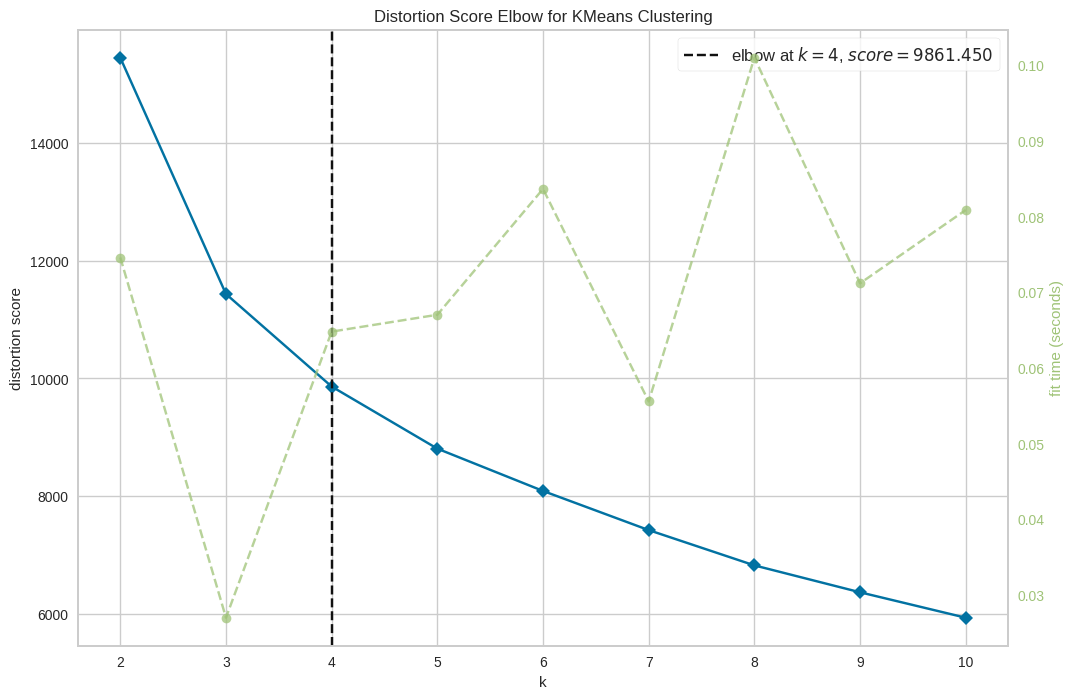

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_pca)
elbow_graph.show()

Note - Best K According to Elbow Method = 4

In [ ]:
kmeans = KMeans(n_clusters = 4 )
cluster = kmeans.fit_predict(data_pca)
df2['cluster']=cluster
cluster.min(),cluster.max()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(0, 4)

In [ ]:
data_pca

array([[ 4.74770919,  1.77463807,  2.0419354 , -1.04156442],
       [-2.35726799, -1.82344989, -1.0858418 , -1.11234158],
       [ 2.29544339, -0.81473993,  0.06030918, -0.27357451],
       ...,
       [ 1.99011702, -1.84363479, -0.05523307, -0.71947022],
       [ 1.50028721, -0.58390424, -2.69461956,  0.54787213],
       [-1.69072019,  1.67157812,  0.67793528, -1.518475  ]])

In [ ]:
cluster

array([3, 2, 3, ..., 3, 0, 4], dtype=int32)

Text(0.5, 1.0, 'clusters in data')

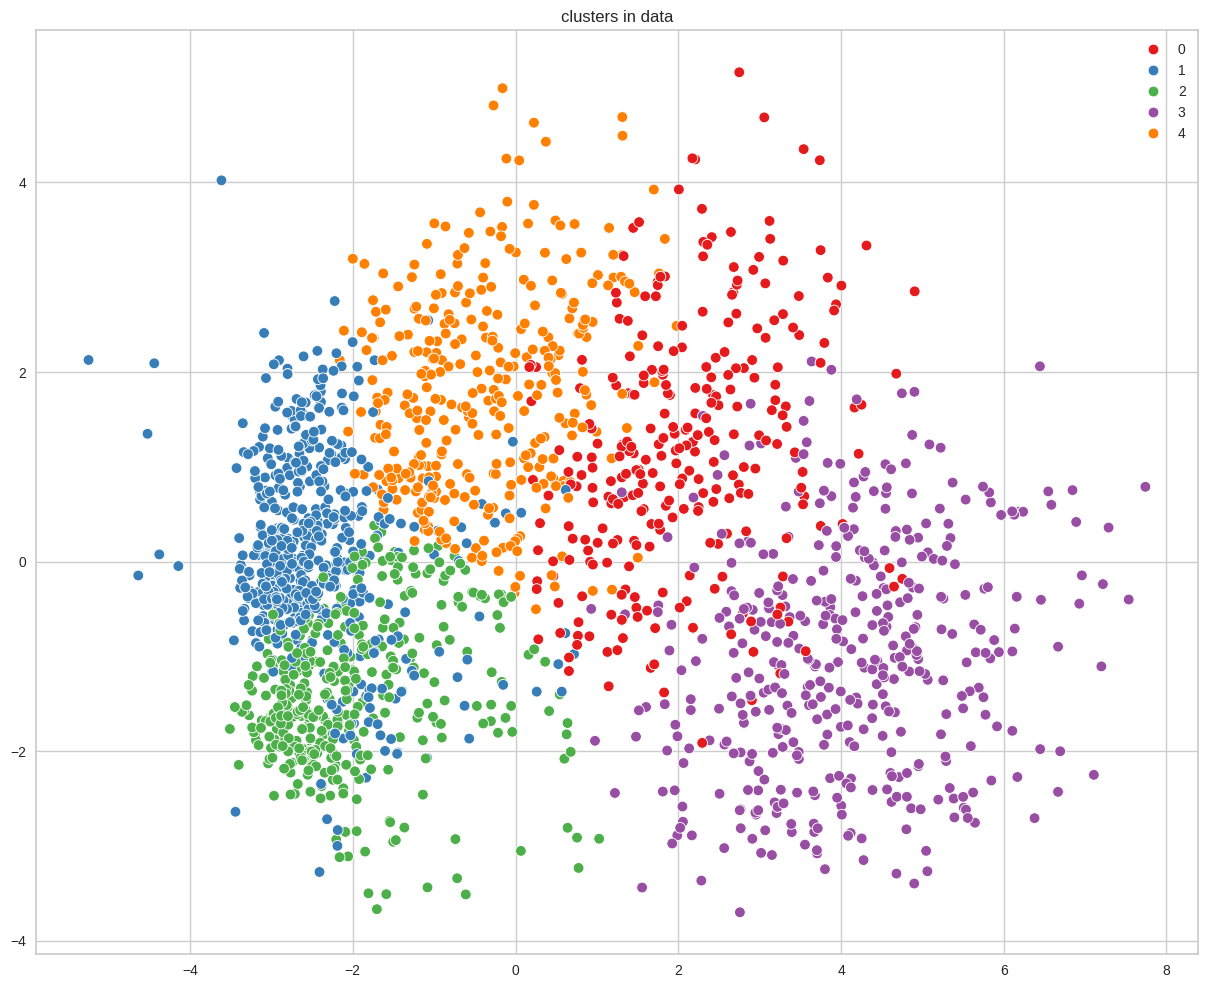

In [ ]:
#ploting cluster
plt.figure(figsize=(15,12))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster,s=60, palette='Set1')
plt.title('clusters in data')

Comparing the Clusters with Annual Income and Spending

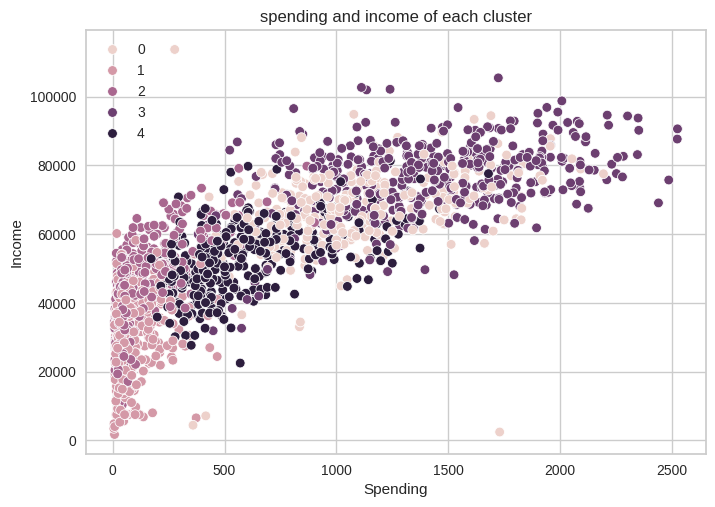

In [ ]:
pl = sns.scatterplot(data = df2, x=df2["Spending"], y=df2["Income"], hue=df2["cluster"])
pl.set_title("spending and income of each cluster")
plt.legend()
plt.show()

<Axes: xlabel='cluster', ylabel='count'>

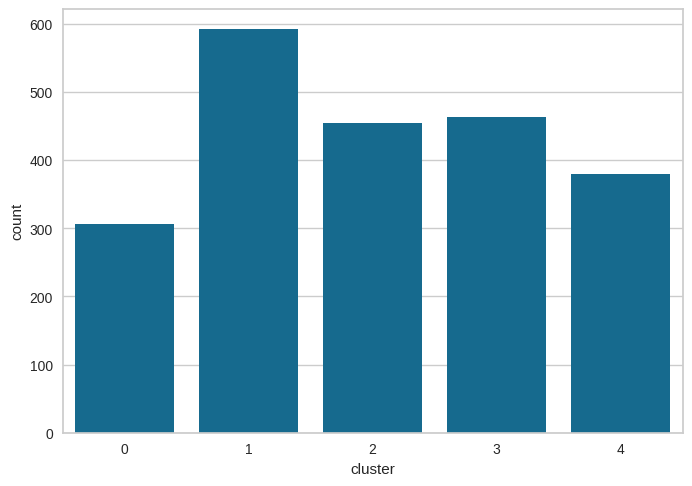

In [ ]:
sns.countplot(x=df2['cluster'])

<Axes: xlabel='cluster', ylabel='Income'>

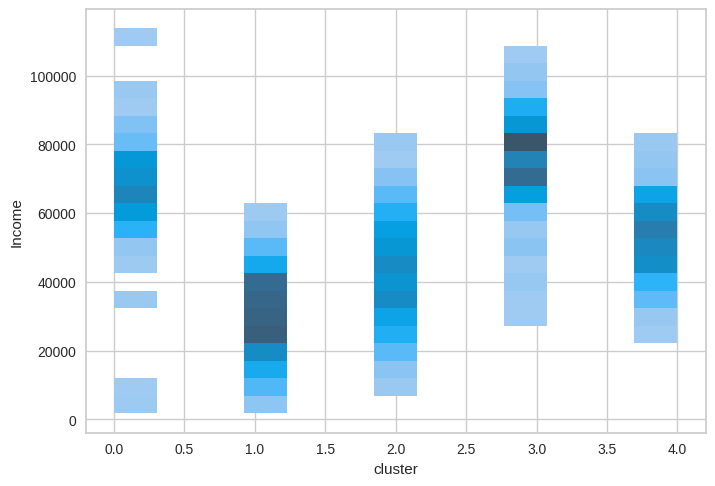

In [ ]:
sns.histplot(x=df2['cluster'],y=df2['Income'])

<Axes: xlabel='cluster', ylabel='Spending'>

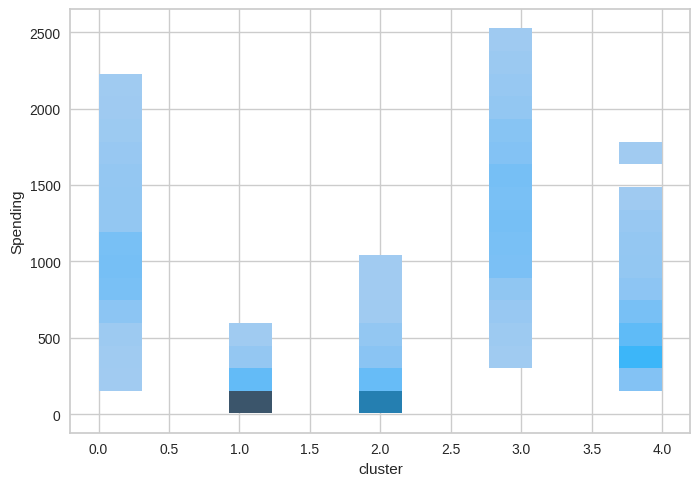

In [ ]:
sns.histplot(x=df2['cluster'],y=df2['Spending'])

# **CONCLUSION**


In conclusion, the analysis of the dataset reveals several key insights about the customer demographics and behaviors. The average age of customers is 53, with a range from 27 to 83. The majority of customers are postgraduates (89%) and in couples (65%). About 51% of clients have one child, and 72% have children. The average income is $51,574.24. Notably, the majority of campaigns are not accepted (79%), and 99% of customers have not complained in the past two years. The correlation between income and age is weakly positive, while there is a positive correlation between income and spending. Couples tend to spend more than single customers, and postgraduate customers have higher incomes than undergraduates. However, there is no correlation between deals and spending. These findings provide valuable insights for targeted marketing strategies, emphasizing the importance of personalized approaches based on customer demographics and behaviors.